In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations, groupby

In [3]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               draw: bool = False) -> list[tuple[int, int]]:
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """

    edges = combinations(range(num_of_nodes), 2)
    G = nx.Graph()
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(0,10)
                
    if draw: 
        plt.figure(figsize=(10,6))
        nx.draw(G, node_color='lightblue', 
            with_labels=True, 
            node_size=500)
    
    return G

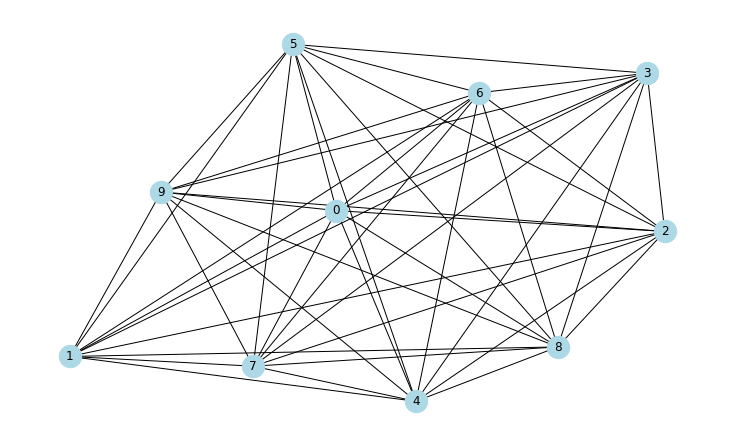

In [7]:
G = gnp_random_connected_graph(10, 1, True)

In [8]:
from networkx.algorithms import tree

In [9]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

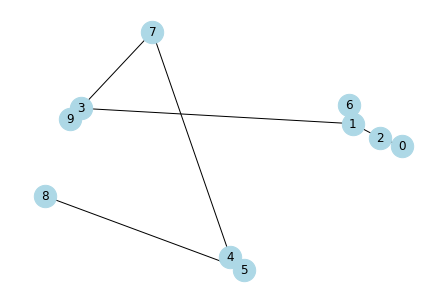

In [15]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [46]:
mstk.edges(), len(mstk.edges())

In [47]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

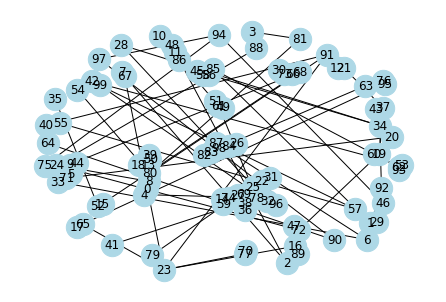

In [48]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [60]:
mstp.edges(), len(mstp.edges())



(EdgeView([(0, 4), (0, 8), (1, 85), (1, 29), (2, 67), (2, 11), (3, 81), (4, 78), (5, 71), (6, 92), (6, 33), (6, 87), (7, 67), (8, 24), (8, 80), (9, 24), (9, 68), (9, 44), (10, 61), (11, 48), (11, 86), (12, 21), (13, 80), (13, 18), (13, 50), (14, 74), (15, 52), (16, 23), (17, 65), (19, 72), (19, 37), (19, 60), (20, 71), (21, 37), (22, 25), (22, 31), (23, 91), (23, 65), (23, 67), (23, 77), (24, 72), (24, 88), (24, 75), (25, 69), (26, 84), (27, 69), (27, 79), (28, 32), (28, 34), (30, 73), (32, 78), (32, 99), (32, 96), (33, 71), (34, 56), (34, 92), (35, 52), (36, 38), (37, 43), (38, 69), (39, 50), (40, 91), (41, 78), (42, 99), (42, 53), (45, 58), (46, 94), (47, 72), (49, 61), (51, 61), (52, 68), (53, 93), (54, 80), (55, 57), (56, 85), (56, 58), (57, 99), (59, 74), (61, 78), (62, 85), (63, 83), (64, 90), (65, 95), (66, 68), (66, 73), (69, 78), (69, 74), (70, 77), (72, 89), (75, 94), (76, 95), (80, 81), (80, 91), (82, 83), (83, 98), (84, 98), (87, 98), (90, 97), (94, 97)]),
 99)

## How to get list of edges for your algorithm

In [57]:
edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges.data()))

nodes = list(G.nodes)


In [64]:
edges[:5]

[(0, 4, 1), (0, 1, 6), (0, 8, 1), (0, 13, 7), (0, 21, 4)]

## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [34]:
import time
from tqdm import tqdm

In [35]:
NUM_OF_ITERATIONS = 1000

In [36]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.1, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start
    
time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:02<00:00, 440.15it/s]


0.0007324004173278808